<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:
nhl_df = pd.read_csv(local_csv)
nhl_df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 2. Perform any required data cleaning. Do some EDA.

In [4]:
nhl_df.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


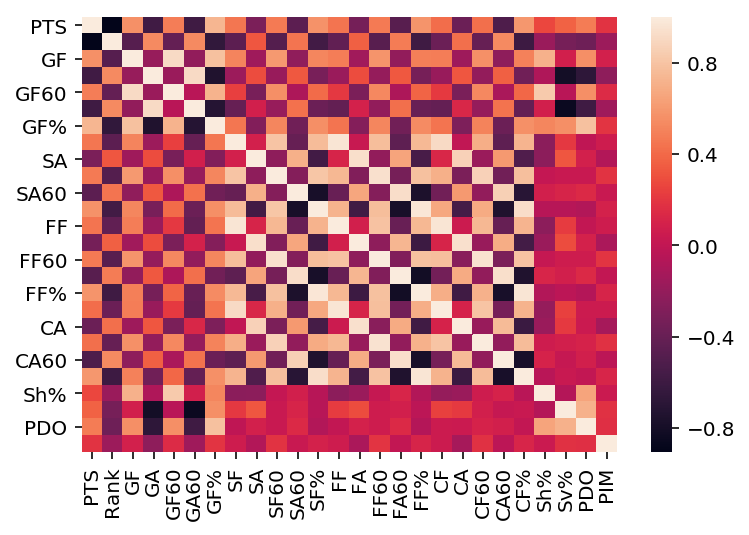

In [5]:
sns.heatmap(nhl_df.corr())

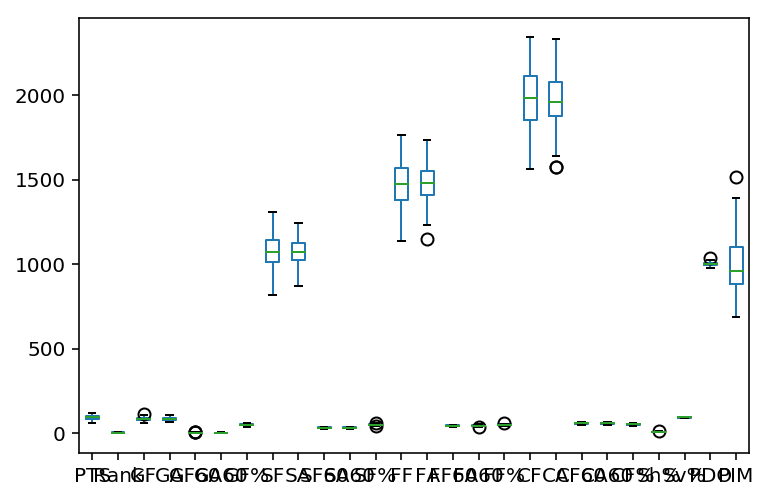

In [6]:
nhl_df.plot(kind='box')

In [9]:
nhl_df.groupby('Team')['Rank'].mean()

Team
Anaheim10         2
Anaheim11         2
Anaheim12         3
Boston10          2
Boston11          1
Boston12          1
Buffalo10         1
Buffalo11         2
Buffalo12         2
Calgary10         2
Calgary11         2
Calgary12         2
Carolina10        3
Carolina11        2
Carolina12        3
Chicago10         1
Chicago11         2
Chicago12         1
Colorado10        3
Colorado11        3
Colorado12        3
Columbus10        2
Columbus11        3
Columbus12        2
Dallas10          2
Dallas11          2
Dallas12          2
Detroit10         1
Detroit11         1
Detroit12         1
                 ..
Philadelphia10    2
Philadelphia11    1
Philadelphia12    1
Phoenix10         1
Phoenix11         2
Phoenix12         2
Pittsburgh10      1
Pittsburgh11      1
Pittsburgh12      1
San Jose10        1
San Jose11        1
San Jose12        2
St. Louis10       2
St. Louis11       3
St. Louis12       1
Tampa Bay10       3
Tampa Bay11       1
Tampa Bay12       3
Toronto10      

In [7]:
nhl_df.Rank.unique()

array([1, 2, 3])

In [8]:
nhl_df.Team.unique()

array(['Washington10', 'Vancouver11', 'San Jose10', 'Chicago10',
       'Vancouver12', 'NY Rangers12', 'St. Louis12', 'Pittsburgh12',
       'Phoenix10', 'Washington11', 'Philadelphia11', 'Pittsburgh11',
       'San Jose11', 'Detroit11', 'Nashville12', 'New Jersey10',
       'Vancouver10', 'Boston11', 'Tampa Bay11', 'Philadelphia12',
       'Detroit10', 'Boston12', 'Detroit12', 'New Jersey12',
       'Los Angeles10', 'Pittsburgh10', 'Chicago12', 'Buffalo10',
       'Nashville10', 'Anaheim11', 'Nashville11', 'Phoenix11',
       'Los Angeles11', 'Chicago11', 'Phoenix12', 'Buffalo11',
       'Montreal11', 'San Jose12', 'Columbus10', 'Dallas11',
       'Los Angeles12', 'Ottawa10', 'Calgary11', 'Florida12',
       'NY Rangers11', 'Ottawa12', 'Washington12', 'Boston10',
       'Carolina11', 'Calgary10', 'St. Louis10', 'Calgary12', 'Anaheim10',
       'Buffalo12', 'Dallas12', 'Dallas10', 'Montreal10', 'Philadelphia10',
       'Columbus12', 'NY Rangers10', 'St. Louis11', 'Minnesota11',
       

In [4]:
# A:
nhl_df.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [15]:
nhl_df.Rank.nunique()

3

There are 3 classes - Rank 1,2,3

In [10]:
# A:
y = nhl_df.Rank

### 4. What is the baseline accuracy?

In [11]:
# A:
baseline = y.value_counts()/y.sum()
baseline

3    0.170330
2    0.164835
1    0.159341
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [12]:
# A:
feature = ['Sh%','Sv%','PDO','PIM']
X = nhl_df[feature]
X.head()

,Sh%,Sv%,PDO,PIM
0,10.34,93.03,1034,1269
1,8.22,93.16,1014,985
2,8.45,93.46,1019,1195
3,8.77,90.44,992,966
4,7.98,93.36,1013,1049


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [13]:
# A:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [16]:
# A:
y_pred = knn.predict(X)

from sklearn import metrics

print(metrics.accuracy_score(y,y_pred))

1.0


100% accuracy means we are overfitting the data

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [17]:
# A:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

y_pred = knn1.predict(X_test)

print(metrics.accuracy_score(y_test , y_pred))


0.555555555556


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [19]:
# A:
knn2 = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn2.fit(X_train,y_train)

y_pred = knn2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.266666666667


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [21]:
# A:
test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_acc.append(knn.score(X_test,y_test))
test_acc

[0.55555555555555558,
 0.40000000000000002,
 0.37777777777777777,
 0.42222222222222222,
 0.40000000000000002,
 0.40000000000000002,
 0.35555555555555557,
 0.37777777777777777,
 0.40000000000000002,
 0.40000000000000002,
 0.33333333333333331,
 0.31111111111111112,
 0.28888888888888886,
 0.28888888888888886,
 0.31111111111111112,
 0.28888888888888886,
 0.31111111111111112,
 0.33333333333333331,
 0.35555555555555557,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.35555555555555557,
 0.35555555555555557,
 0.35555555555555557,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

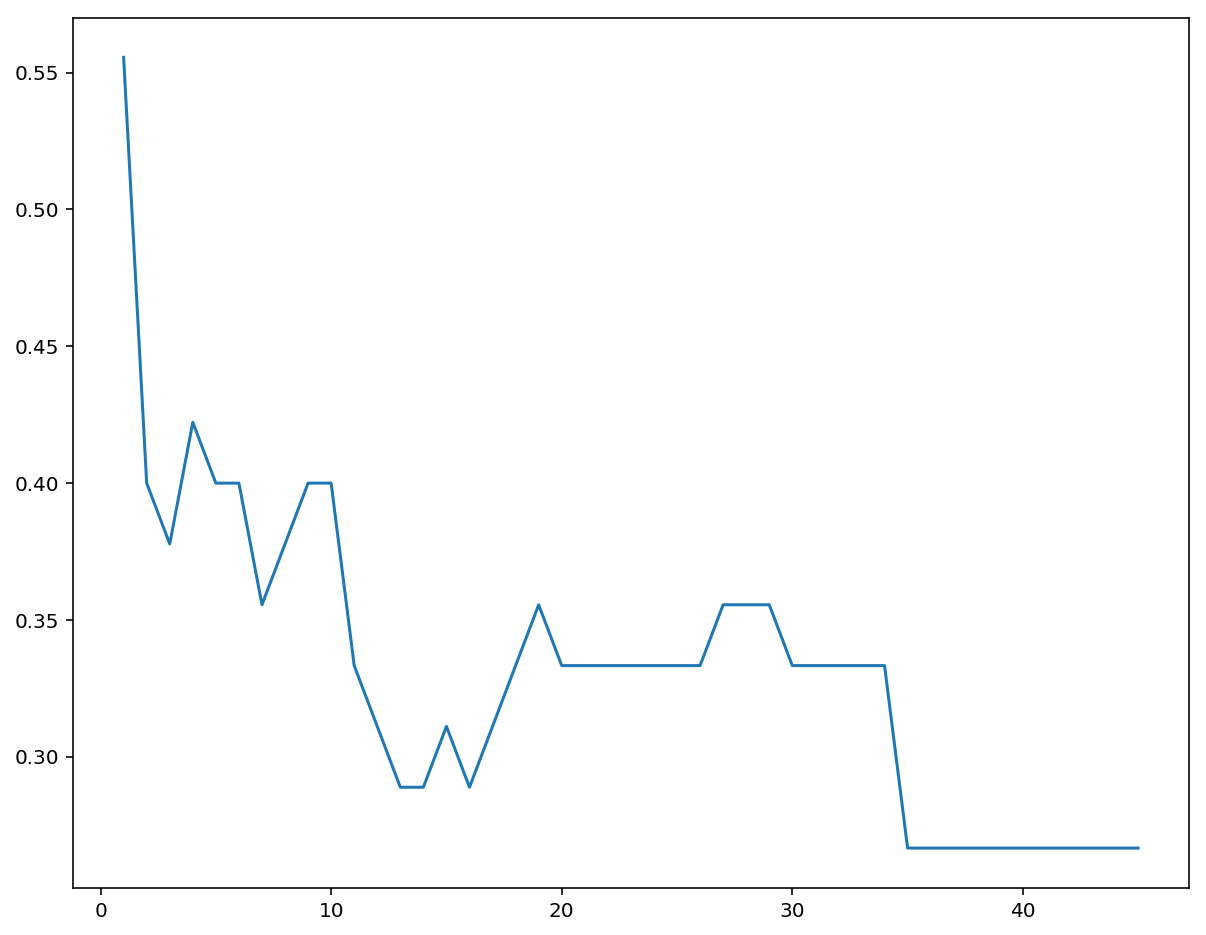

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(1,X_train.shape[0] + 1), test_acc)
plt.show()



### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: